#Анализ Киноиндустрии

*   [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset)
*   [Презентация](https://drive.google.com/file/d/1kfFj8XZE_FR4nkNJ5E1nbFV27yEKIAD7/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from ast import literal_eval

In [ ]:
# подключаемся к google drive для импорта файлов
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Импортируем данные

movies_metadata - основная информация о фильмах

In [ ]:
# импортируем dataset, убиваем дубликаты и выбираем адекватные данные
mm = pd.read_csv('/content/gdrive/My Drive/The Movies Dataset/dataset/movies_metadata.csv', sep=',', header='infer') 
mm.drop_duplicates(inplace=True)
mm = mm[(mm['runtime'] > 30) & (mm['revenue'] > 50) & (mm['budget'] != '0') & (mm['status'] == 'Released') ] # полнометражные и вышедшие в прокат и с хоть каким-то бюджетом

mm.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 0 to 45422
Data columns (total 24 columns):
adult                    5322 non-null object
belongs_to_collection    1220 non-null object
budget                   5322 non-null object
genres                   5322 non-null object
homepage                 1903 non-null object
id                       5322 non-null object
imdb_id                  5322 non-null object
original_language        5322 non-null object
original_title           5322 non-null object
overview                 5320 non-null object
popularity               5322 non-null object
poster_path              5322 non-null object
production_companies     5322 non-null object
production_countries     5322 non-null object
release_date             5322 non-null object
revenue                  5322 non-null float64
runtime                  5322 non-null float64
spoken_languages         5322 non-null object
status                   5322 non-null object
tagline         

In [ ]:
# видим противоречия с типами столбцов и их содержимым, поэтому поправим те данные, которые нам понадобится в дальнейшем

mm['adult'] = mm['adult'].map({'False':0,'True':1}) # меняем столбец на 1 и 0
mm['budget'] = mm['budget'].astype('int') # бюджет переводим в число
mm['id'] = mm['id'].astype('int') # переводим в число
mm['popularity'] = mm['popularity'].astype('float') # популярность переводим в число
mm['release_date'] = mm['release_date'].astype('datetime64') # дату релиза переводим в нормальную дату

mm.describe()

,adult,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5322.0,5.322000e+03,5322.000000,5322.000000,5.322000e+03,5322.000000,5322.000000,5322.000000
mean,0.0,3.141169e+07,60462.654453,9.851682,9.130316e+07,110.116873,6.278204,739.872416
std,0.0,4.026839e+07,95689.523234,13.871461,1.667951e+08,21.459512,0.918047,1256.336060
min,0.0,1.000000e+00,5.000000,0.000001,5.700000e+01,57.000000,0.000000,0.000000
25%,0.0,5.610470e+06,8677.250000,5.546865,7.438141e+06,95.000000,5.700000,80.000000
50%,0.0,1.700000e+07,14273.000000,8.435468,3.043705e+07,106.000000,6.300000,282.000000
75%,0.0,4.000000e+07,59961.750000,11.775760,1.005153e+08,120.000000,6.900000,812.000000
max,0.0,3.800000e+08,443319.000000,547.488298,2.787965e+09,338.000000,9.100000,14075.000000


In [ ]:
# добавим нужные столбцы и преобразования

mm['budget'] = mm['budget'] / 1000000 # переведем в миллионы
mm['revenue'] = mm['revenue'] / 1000000 # переведем в миллионы
mm['year'] = mm['release_date'].apply(lambda x: x.year) #год
mm['decade'] = pd.cut(mm['year'], bins=np.arange(1910, 2030, 10)) # десятилетие
mm['profitability'] = mm['revenue'] / mm['budget'] # рентабельность фильма
mm['profitability'] = mm['profitability'].apply(lambda x: round(x, 2)) #округляем
mm['popularity'] = mm['popularity'].apply(lambda x: round(x, 2)) #округляем
mm['genres_full'] = mm['genres'].apply(lambda x: [item['name'] for item in json.loads(x.replace('\'', '"'))]) # выковыриваем набор жанров
mm['countries_full'] = mm['production_countries'].apply(lambda x: [item['name'] for item in json.loads(x.replace('\'', '"'))]) # выковыриваем список стран
mm = mm[(mm['budget'] > 0.1)] # убираем низкобюджетные фильмы

mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5237 entries, 0 to 45422
Data columns (total 29 columns):
adult                    5237 non-null int64
belongs_to_collection    1210 non-null object
budget                   5237 non-null float64
genres                   5237 non-null object
homepage                 1875 non-null object
id                       5237 non-null int64
imdb_id                  5237 non-null object
original_language        5237 non-null object
original_title           5237 non-null object
overview                 5235 non-null object
popularity               5237 non-null float64
poster_path              5237 non-null object
production_companies     5237 non-null object
production_countries     5237 non-null object
release_date             5237 non-null datetime64[ns]
revenue                  5237 non-null float64
runtime                  5237 non-null float64
spoken_languages         5237 non-null object
status                   5237 non-null object
tagline 

In [ ]:
mm.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,decade,profitability,genres_full,countries_full
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373.554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,"(1990, 2000]",12.45,"[Animation, Comedy, Family]",[United States of America]
1,0,NaN,65.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262.797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,"(1990, 2000]",4.04,"[Adventure, Fantasy, Family]",[United States of America]
3,0,NaN,16.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81.452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,"(1990, 2000]",5.09,"[Comedy, Drama, Romance]",[United States of America]


credits - информация о актерах и команде фильма

In [ ]:
# импортируем dataset, чистим
cr = pd.read_csv('/content/gdrive/My Drive/The Movies Dataset/dataset/credits.csv', sep=',', header='infer')
cr.drop_duplicates(inplace=True)
cr.dropna(inplace=True)
cr['id'] = cr['id'].astype('int')

cr.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [ ]:
# преобразуем месево в строках в структуру
features = ['cast', 'crew']
for feature in features:
    cr[feature] = cr[feature].apply(literal_eval)

In [ ]:
# выковыриваем режиссера

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

cr['director'] = cr['crew'].apply(get_director)
cr.head(5)

,cast,crew,id,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


In [ ]:
# выковыриваем актеров

def get_actors(actors):
    if isinstance(actors, list):
        actor_names = [actor['name'] for actor in actors]
    else:
        actor_names = []
    return actor_names


cr['actors'] = cr['cast'].apply(get_actors)
cr.head(5)

,cast,crew,id,director,actors
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


финальный dataframe

In [ ]:
# объединяем в общий и красивый датафрейм для дальнейшего анализа

df = pd.merge(mm, cr, on='id', how='left')
df = df[['id', 'title', 'runtime', 'year', 'decade',
         'director', 'actors',
         'countries_full', 'genres_full', 
         'budget', 'revenue', 'profitability', 
         'popularity', 'vote_average']]

df.head(5)

,id,title,runtime,year,decade,director,actors,countries_full,genres_full,budget,revenue,profitability,popularity,vote_average
0,862,Toy Story,81.0,1995,"(1990, 2000]",John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[United States of America],"[Animation, Comedy, Family]",30.0,373.554033,12.45,21.95,7.7
1,8844,Jumanji,104.0,1995,"(1990, 2000]",Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[United States of America],"[Adventure, Fantasy, Family]",65.0,262.797249,4.04,17.02,6.9
2,31357,Waiting to Exhale,127.0,1995,"(1990, 2000]",Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devi...",[United States of America],"[Comedy, Drama, Romance]",16.0,81.452156,5.09,3.86,6.1
3,949,Heat,170.0,1995,"(1990, 2000]",Michael Mann,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[United States of America],"[Action, Crime, Drama, Thriller]",60.0,187.436818,3.12,17.92,7.7
4,9091,Sudden Death,106.0,1995,"(1990, 2000]",Peter Hyams,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[United States of America],"[Action, Adventure, Thriller]",35.0,64.350171,1.84,5.23,5.5


## Общий анализ кинорынка

Text(0, 0.5, 'Количество')

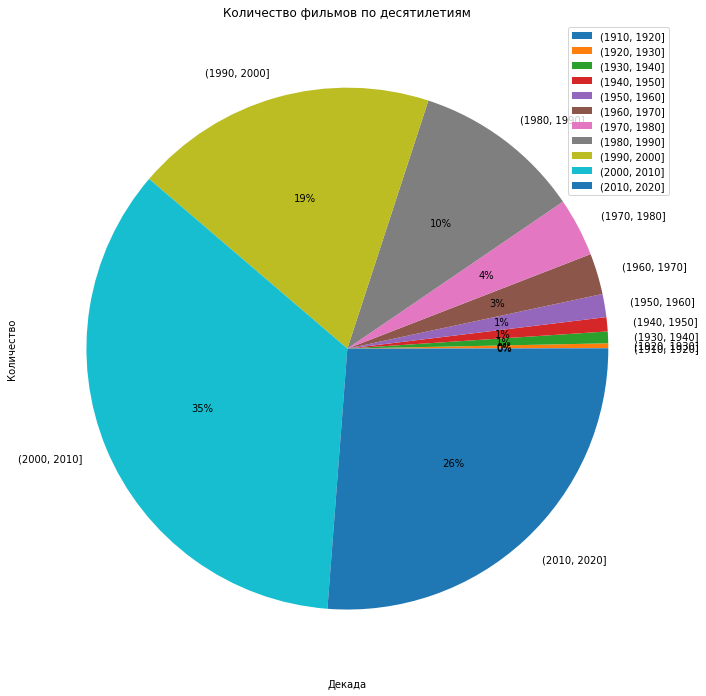

In [ ]:
# после 90-х начался кинематографичекий бум
# пик по количеству фильмов был в 2000-2010х (но статистика до 2017 года, поэтому нужно пересчитать в 2021 году)

df_decade = df.pivot_table(
    values = ['title'], 
    index = ['decade'],
    aggfunc={'title': 'count'})

df_decade.plot.pie(subplots=True, figsize=(12,12), autopct='%1.0f%%')

plt.title('Количество фильмов по десятилетиям')
plt.xlabel('Декада')
plt.ylabel('Количество')

Text(0.5, 1.0, 'Рентабельность')

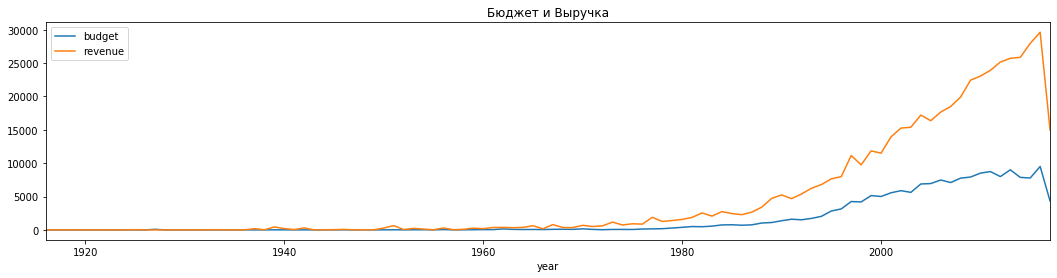

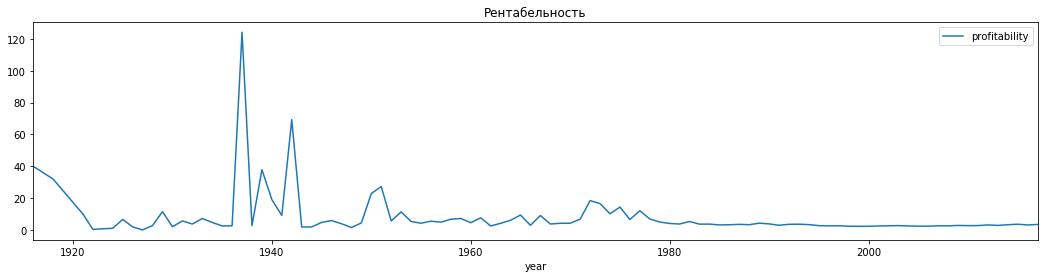

In [ ]:
# начиная с 80-х в фильмы стали вкладывать большой бюджет, что увеличило и выручку 
# но рентабельность с 80-х стала снижаться и стабилизировалась, несмотря на все возрастающие бюджеты и выручку

df_revenue = df.pivot_table(
    values = ['revenue', 'budget'], 
    index = ['year'],
    aggfunc={'revenue': sum,'budget': sum})

df_revenue['profitability'] = df_revenue['revenue'] / df_revenue['budget'] # посчитаем среднюю рентабельность за год

df_revenue[['budget', 'revenue']].plot(figsize=(18,4))
plt.title('Бюджет и Выручка')
df_revenue[['profitability']].plot(figsize=(18,4))
plt.title('Рентабельность')

Text(0, 0.5, 'Выручка')

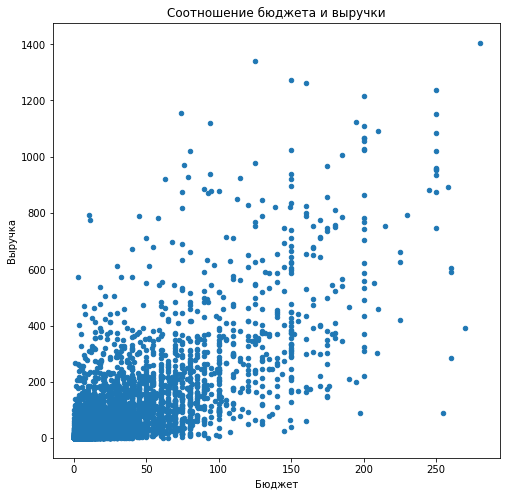

In [ ]:
# в основном чем выше бюджет, тем выше выручка (но высокий бюджет не гарантирует большую выручку)

df_1 = df[(df['revenue'] < 1500) & (df['budget'] < 300)] #уберем выбросы
df_1.plot.scatter(x='budget', y='revenue', figsize=(8,8))
plt.title('Соотношение бюджета и выручки')
plt.xlabel('Бюджет')
plt.ylabel('Выручка')

Text(0, 0.5, 'Популярность')

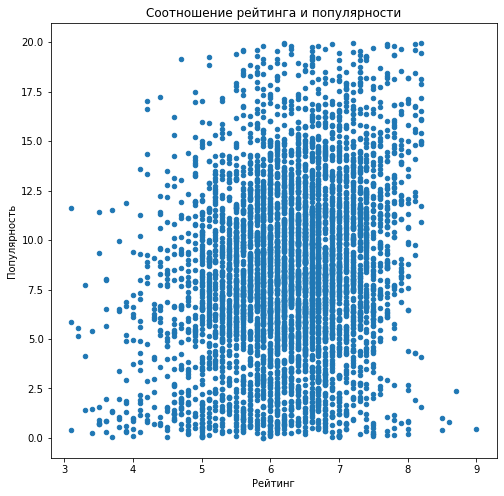

In [ ]:
# высокая популярность фильма не гарантирует хорошую оценку так и наоборот

df_2 = df[(df['popularity'] < 20) & (df['vote_average'] > 3)] #уберем выбросы
df_2.plot.scatter(x='vote_average', y='popularity', figsize=(8, 8))

plt.title('Соотношение рейтинга и популярности')
plt.xlabel('Рейтинг')
plt.ylabel('Популярность')

Text(0, 0.5, 'Количество фильмов')

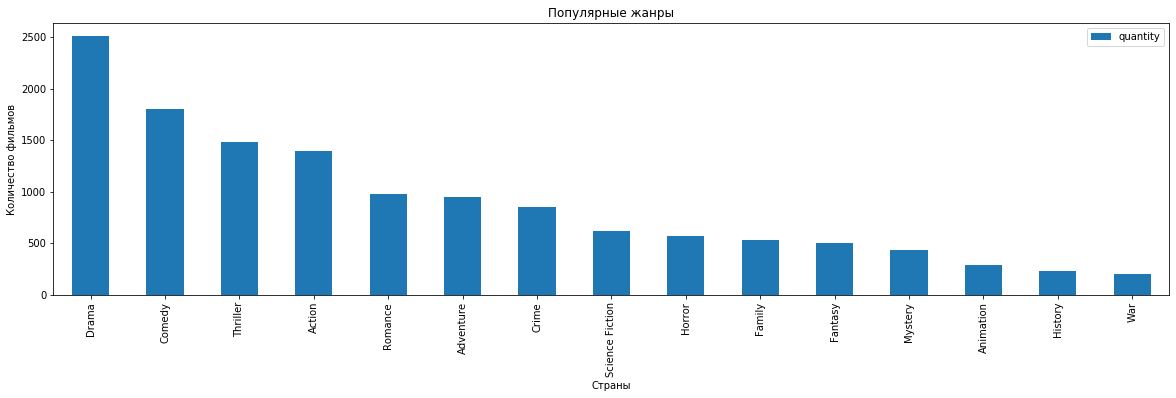

In [ ]:
# в основном фильмы снимаются в жанрах: драма, комедия, триллер, экшн

df_genres = df[['genres_full']] 
df_genres = pd.Series(np.concatenate(df_genres.genres_full)) # разобьем на отдельные значения, чтобы посчитать количество жанров
df_genres = df_genres.groupby(df_genres).size().rename_axis('genres').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:15] # сгруппируем

df_genres.plot.bar(x='genres', y='quantity', figsize=(20,5))

plt.title('Популярные жанры')
plt.xlabel('Страны')
plt.ylabel('Количество фильмов')

Text(0, 0.5, 'Количество фильмов')

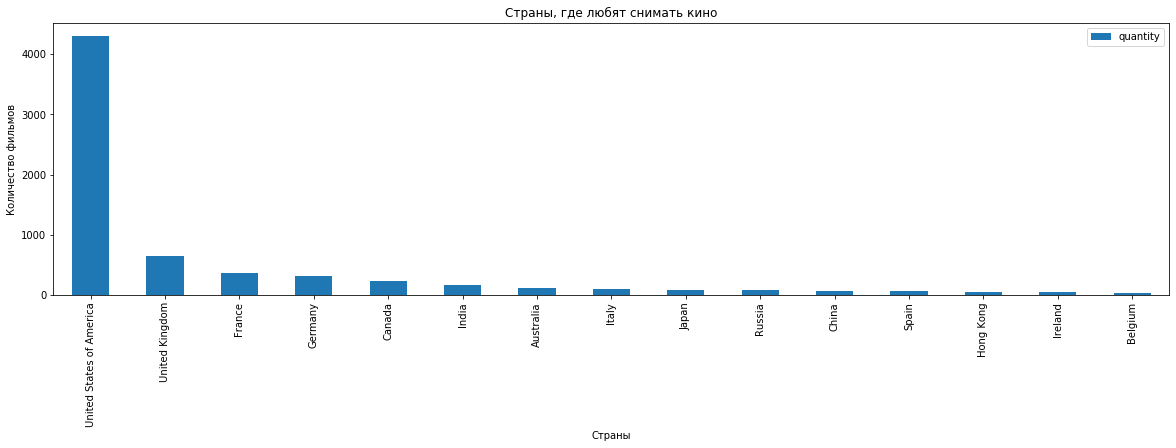

In [ ]:
# в основном фильмы снимаются в странах: США (но РФ таки попала в топ-10)

df_countries = df[['countries_full']] 
df_countries = pd.Series(np.concatenate(df_countries.countries_full)) # разобьем на отдельные значения, чтобы посчитать количество стран
df_countries = df_countries.groupby(df_countries).size().rename_axis('countries').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:15] # сгруппируем

df_countries.plot.bar(x='countries', y='quantity', figsize=(20,5))

plt.title('Страны, где любят снимать кино')
plt.xlabel('Страны')
plt.ylabel('Количество фильмов')

Text(0.5, 1.0, 'Режиссеры с максимальной выручкой')

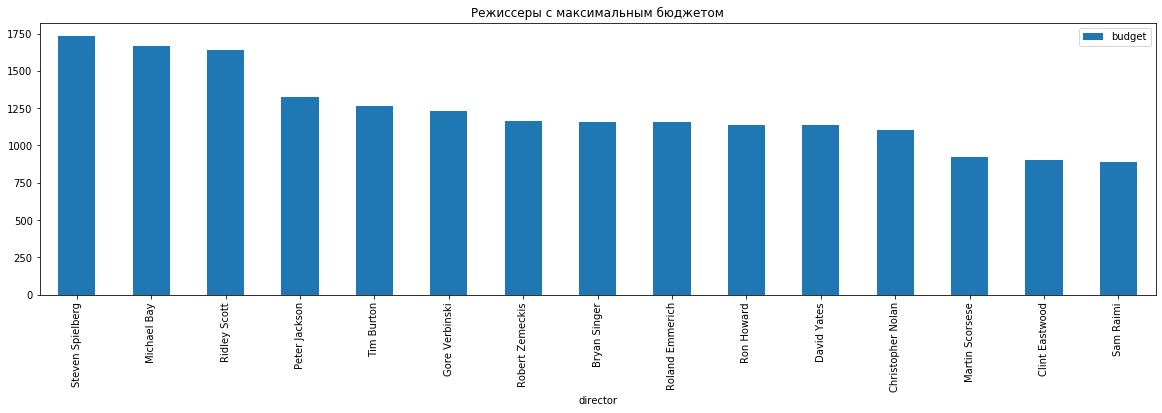

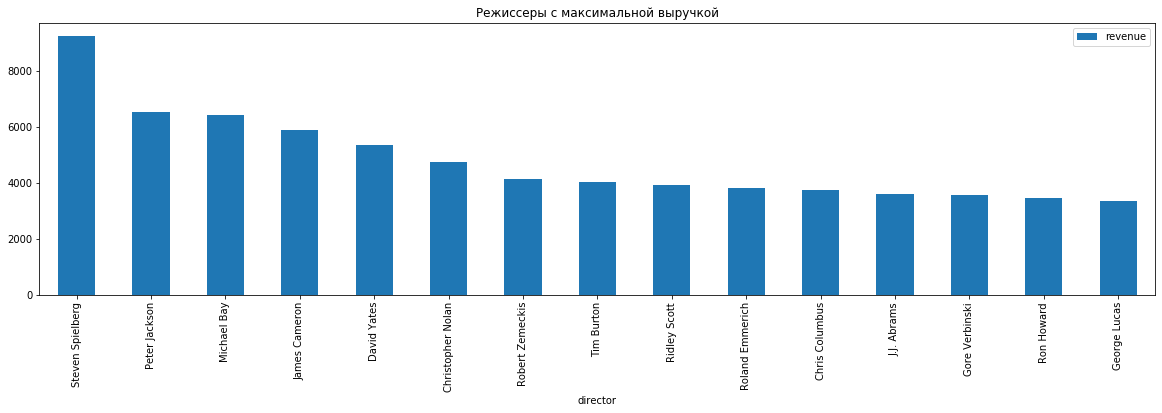

In [ ]:
# Спилберг тратит и зарабатывает больше всех!

df_dir = df[['director', 'revenue','budget']]

df_dir = df.pivot_table(
    values = ['revenue', 'budget'], 
    index = ['director'],
    aggfunc={'revenue': sum,'budget': sum}).reset_index()

top_budget_dir = df_dir[['director','budget']].sort_values(by=['budget'], ascending=False)[:15]
top_revenue_dir = df_dir[['director','revenue']].sort_values(by=['revenue'], ascending=False)[:15]

top_budget_dir.plot.bar(x='director', y='budget', figsize=(20,5))
plt.title('Режиссеры с максимальным бюджетом')
top_revenue_dir.plot.bar(x='director', y='revenue', figsize=(20,5))
plt.title('Режиссеры с максимальной выручкой')

Text(0, 0.5, 'Количество фильмов')

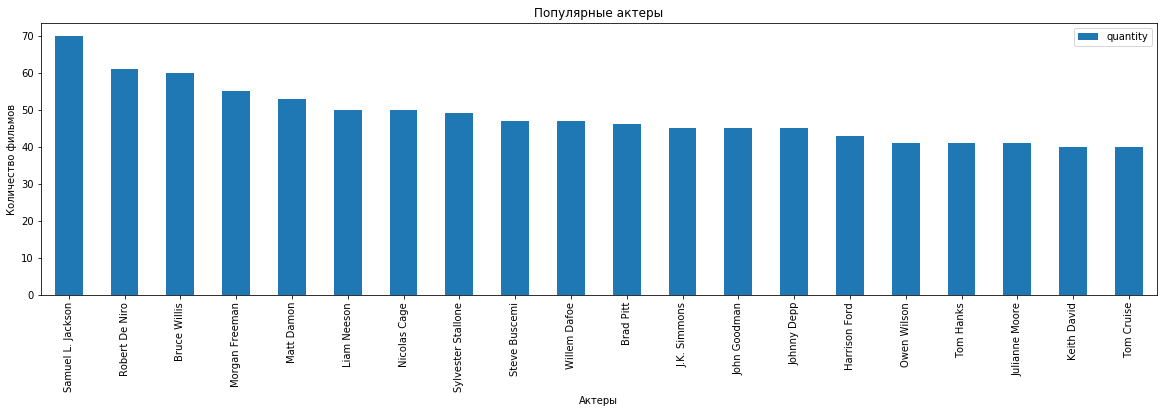

In [ ]:
# актеры, которые на сегодня снялись в наибольшем количестве фильмов: Сэмюэл Л. Джексон, Роберт Де Ниро, Брюс Уиллис

df_actors = df[['actors']]
df_actors = pd.Series(np.concatenate(df_actors.actors)) # разобьем на отдельные значения, чтобы посчитать количество актеров и сколько раз они встречаются
df_actors = df_actors.groupby(df_actors).size().rename_axis('actors').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:20] # сгруппируем

df_actors.plot.bar(x='actors', y='quantity', figsize=(20,5))

plt.title('Популярные актеры')
plt.xlabel('Актеры')
plt.ylabel('Количество фильмов')

## Кто обеспечит получение Оскара?

т.к. каждому фильму присущи несколько параметров (несколько жанров, много актеров, несколько режиссеров), то сделаем группы фильмов с наилучшими и наихудшими показателями, которые далее и будем анализировать


In [ ]:
# посмотрим средние показатели, чтобы понять, по каким критериям будем создавать группы лучших и худших
df.describe()

,id,runtime,year,budget,revenue,profitability,popularity,vote_average
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000
mean,60286.184888,110.363289,1999.907270,31.909333,92.561436,4.691332,9.939998,6.278973
std,95693.975445,21.372569,15.648482,40.381830,167.707816,16.264637,13.949656,0.911203
min,5.000000,62.000000,1916.000000,0.103000,0.000057,0.000000,0.000000,0.000000
25%,8536.000000,96.000000,1994.000000,6.000000,8.000000,0.790000,5.660000,5.700000
50%,14047.000000,106.000000,2004.000000,18.000000,31.609243,2.040000,8.500000,6.300000
75%,59860.000000,120.000000,2011.000000,40.000000,101.758490,4.160000,11.820000,6.900000
max,443319.000000,338.000000,2017.000000,380.000000,2787.965087,653.850000,547.490000,9.100000


In [ ]:
# сгенерим датафрейм фильмов с показателями успешности фильма (наиболее прибыльные, популярные, с высокой оценкой)
df_oscar = df[(df['profitability'] > 3) & (df['popularity'] > 9) & (df['vote_average'] > 7)]
df_oscar.describe()

# в среднем на хороший фильм придется инвестировать - 41 млн., а средняя выручка - 264 млн.

,id,runtime,year,budget,revenue,profitability,popularity,vote_average
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,54757.860241,123.975904,1995.036145,40.858004,264.303538,14.194602,21.390651,7.524819
std,101579.097147,25.877161,18.725867,55.909880,335.598334,38.900038,28.482704,0.330986
min,11.000000,76.000000,1934.000000,0.114000,1.423000,3.010000,9.020000,7.100000
25%,589.500000,106.000000,1984.000000,5.650000,53.372583,4.340000,11.620000,7.300000
50%,2062.000000,120.000000,2001.000000,17.000000,128.798265,6.290000,14.630000,7.500000
75%,44451.500000,136.000000,2010.000000,47.500000,351.577365,11.395000,19.925000,7.700000
max,419430.000000,238.000000,2017.000000,280.000000,2787.965087,653.850000,294.340000,9.100000


In [ ]:
df_oscar.head(3)

,id,title,runtime,year,decade,director,actors,countries_full,genres_full,budget,revenue,profitability,popularity,vote_average
0,862,Toy Story,81.0,1995,"(1990, 2000]",John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[United States of America],"[Animation, Comedy, Family]",30.0,373.554033,12.45,21.95,7.7
3,949,Heat,170.0,1995,"(1990, 2000]",Michael Mann,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[United States of America],"[Action, Crime, Drama, Thriller]",60.0,187.436818,3.12,17.92,7.7
10,4584,Sense and Sensibility,136.0,1995,"(1990, 2000]",Ang Lee,"[Kate Winslet, Emma Thompson, Hugh Grant, Tom ...","[United Kingdom, United States of America]","[Drama, Romance]",16.5,135.000000,8.18,10.67,7.2


In [ ]:
df_top_actors = df_oscar[['actors']].reset_index()

df_top_actors = pd.Series(np.concatenate(df_top_actors.actors))
df_top_actors = df_top_actors.groupby(df_top_actors).size().rename_axis('actors').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:13]

df_top_actors

,actors,quantity
11665,Samuel L. Jackson,14
12907,Tom Hanks,13
8807,Matt Damon,12
13455,Warwick Davis,12
1479,Brad Pitt,11
239,Alan Rickman,11
6659,John Ratzenberger,11
12188,Stan Lee,10
5632,James Earl Jones,9
4295,Frank Welker,9


In [ ]:
df_top_countries = df_oscar[['countries_full']].reset_index()
df_top_countries = pd.Series(np.concatenate(df_top_countries.countries_full))
df_top_countries = df_top_countries.groupby(df_top_countries).size().rename_axis('countries').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:10]

df_top_countries

,countries,quantity
34,United States of America,367
33,United Kingdom,74
11,Germany,28
10,France,19
5,Canada,13
19,Japan,11
18,Italy,11
29,Spain,8
23,New Zealand,8
15,India,8


In [ ]:
df_top_director = df_oscar[['director']].reset_index()
df_top_director = pd.Series(np.concatenate(df_top_director.director, axis=None))
df_top_director = df_top_director.groupby(df_top_director).size().rename_axis('director').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:7]

df_top_director

# если отсортировать по рентабельности, то в топе много режиссеров, которые уже померли :( поэтому возращаемся к методе по количеству, как наибольшей вероятности
# df_top_director = df_oscar.pivot_table(
#    values = ['revenue', 'budget'], 
#    index = ['director'],
#    aggfunc={'revenue': sum,'budget': sum})
# df_top_director['profitability'] = df_top_director['revenue'] / df_top_director['budget']
# df_top_director.sort_values(by=['profitability'], ascending=False)[:15] 

,director,quantity
237,Steven Spielberg,13
193,Quentin Tarantino,8
8,Alfred Hitchcock,8
43,Clint Eastwood,6
213,Robert Zemeckis,6
42,Christopher Nolan,6
120,Joel Coen,5


In [ ]:
df_top_genres = df_oscar[['genres_full']].reset_index()
df_top_genres = pd.Series(np.concatenate(df_top_genres.genres_full))
df_top_genres = df_top_genres.groupby(df_top_genres).size().rename_axis('genres').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:10]

df_top_genres

,genres,quantity
6,Drama,232
15,Thriller,101
0,Action,98
1,Adventure,96
3,Comedy,90
4,Crime,75
13,Romance,63
14,Science Fiction,53
7,Family,49
8,Fantasy,44


## Кто обеспечит получение Золотой Малины?

In [ ]:
# сгенерим датафрейм фильмов с показателями неуспешности фильма (убыточные (+ те, что еле окупились непопулярные, с низкой оценкой)
df_razzie = df[(df['profitability'] < 1) & (df['popularity'] < 6) & (df['vote_average'] < 5.5)]
df_razzie.describe()

# в среднем для "так себе фильма" придется инвестировать - 21 млн., а средняя выручка - 12 млн.

,id,runtime,year,budget,revenue,profitability,popularity,vote_average
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,61719.805430,101.642534,1999.977376,18.693267,7.007083,0.346787,2.814480,4.574208
std,75225.888079,14.795386,10.632473,20.055722,10.683546,0.290185,1.857579,0.954851
min,494.000000,74.000000,1954.000000,0.120000,0.000057,0.000000,0.030000,0.000000
25%,16784.000000,91.000000,1993.000000,5.000000,0.570000,0.080000,1.160000,4.300000
50%,36698.000000,99.000000,2001.000000,13.500000,2.297493,0.270000,2.480000,4.800000
75%,67772.000000,110.000000,2009.000000,25.000000,10.719357,0.580000,4.660000,5.200000
max,347979.000000,171.000000,2016.000000,120.000000,77.741732,0.990000,5.980000,5.400000


In [ ]:
df_bottom_actors = df_razzie[['actors']].reset_index()

df_bottom_actors = pd.Series(np.concatenate(df_bottom_actors.actors))
df_bottom_actors = df_bottom_actors.groupby(df_bottom_actors).size().rename_axis('actors').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:13]

df_bottom_actors

,actors,quantity
1620,Julianne Moore,5
3170,Yuriy Kutsenko,4
1469,Joe Pantoliano,4
1265,Jaime Pressly,3
2910,Sylvester Stallone,3
1028,Fyodor Bondarchuk,3
1679,Katharine Towne,3
1681,Kathleen Freeman,3
2096,Maury Chaykin,3
563,Christopher McDonald,3


In [ ]:
df_bottom_countries = df_razzie[['countries_full']].reset_index()
df_bottom_countries = pd.Series(np.concatenate(df_bottom_countries.countries_full))
df_bottom_countries = df_bottom_countries.groupby(df_bottom_countries).size().rename_axis('countries').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:10]

df_bottom_countries

,countries,quantity
28,United States of America,166
27,United Kingdom,16
8,Germany,13
21,Russia,13
3,Canada,7
0,Australia,6
14,Italy,6
12,India,5
7,France,5
2,Belgium,3


In [ ]:
df_bottom_director = df_razzie[['director']].reset_index()
df_bottom_director = pd.Series(np.concatenate(df_bottom_director.director, axis=None))
df_bottom_director = df_bottom_director.groupby(df_bottom_director).size().rename_axis('director').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:7]

df_bottom_director

,director,quantity
60,Gary Goldman,3
97,John Guillermin,3
207,nan,2
99,John Schlesinger,2
45,David Gordon Green,2
85,James Toback,2
24,Blake Edwards,2


In [ ]:
df_bottom_genres = df_razzie[['genres_full']].reset_index()
df_bottom_genres = pd.Series(np.concatenate(df_bottom_genres.genres_full))
df_bottom_genres = df_bottom_genres.groupby(df_bottom_genres).size().rename_axis('genres').reset_index(name='quantity').sort_values(by=['quantity'], ascending=False)[:10]

df_bottom_genres

,genres,quantity
6,Drama,99
3,Comedy,96
16,Thriller,60
0,Action,59
14,Romance,46
1,Adventure,31
11,Horror,27
15,Science Fiction,26
4,Crime,24
7,Family,23


## ИТОГО

в результатах стран и жанров в топ лучших и топ худших есть пересечения 

поэтому, для надежности, уберем эти пересечения

In [ ]:
a = set(df_top_genres.genres)
b = set(df_bottom_genres.genres)

print(f'Если фильм снят в жанре {a - b} то, скорее всего, он будет хорош.')
print(f'Если фильм снят в жанре {b - a} то, скорее всего, он будет не очень.')

Если фильм снят в жанре {'Fantasy'} то, скорее всего, он будет хорош.
Если фильм снят в жанре {'Horror'} то, скорее всего, он будет не очень.


In [ ]:
c = set(df_top_actors.actors)
d = set(df_bottom_actors.actors)

print(f'Если в фильме снимаются {c - d} то, скорее всего, он будет хорош.')
print(f'Если в фильме снимаются {d - c} то, скорее всего, он будет не очень.')

Если в фильме снимаются {'James Earl Jones', 'Tom Hanks', 'Matt Damon', 'Warwick Davis', 'Matthew Lewis', 'Alan Rickman', 'Leonardo DiCaprio', 'Philip Ettington', 'Stan Lee', 'Brad Pitt', 'Samuel L. Jackson', 'John Ratzenberger', 'Frank Welker'} то, скорее всего, он будет хорош.
Если в фильме снимаются {'Katharine Towne', 'Dan Hedaya', 'Yuriy Kutsenko', 'Jaime Pressly', 'Joe Pantoliano', 'Fyodor Bondarchuk', 'Maury Chaykin', "Ryan O'Neal", 'Stefania Rocca', 'Kathleen Freeman', 'Julianne Moore', 'Christopher McDonald', 'Sylvester Stallone'} то, скорее всего, он будет не очень.


In [ ]:
e = set(df_top_countries.countries)
f = set(df_bottom_countries.countries)

print(f'Если фильм снят в {e - f} то, скорее всего, он будет хорош.') 
print(f'Если фильм снят в {f - e} то, скорее всего, он будет не очень.') 

Если фильм снят в {'Spain', 'Japan', 'New Zealand'} то, скорее всего, он будет хорош.
Если фильм снят в {'Russia', 'Australia', 'Belgium'} то, скорее всего, он будет не очень.


In [ ]:
g = set(df_top_director.director)
h = set(df_bottom_director.director)

print(f'Если фильм снял {g - h} то, скорее всего, он будет хорош.') 
print(f'Если фильм снял {h - g} то, скорее всего, он будет не очень.')

Если фильм снял {'Alfred Hitchcock', 'Christopher Nolan', 'Clint Eastwood', 'Quentin Tarantino', 'Robert Zemeckis', 'Steven Spielberg', 'Joel Coen'} то, скорее всего, он будет хорош.
Если фильм снял {'Gary Goldman', 'Blake Edwards', 'James Toback', 'nan', 'John Guillermin', 'David Gordon Green', 'John Schlesinger'} то, скорее всего, он будет не очень.


получается, что: 
- успех фильма мало зависит от жанра или страны производства
- успех фильма больше зависит от режиссера и актеров


p.s. если Гари Голдман снимет в России фильм ужасов в главной роли с Гошей Куценко - случится страшное!